This notebooks investigates the correlations between characteristics in the processed Fannie Mae dataset and performs PCA.

In [2]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Read data
path_2019 = './../../dataset/2019_stat.csv'
path_2020 = './../../dataset/2020_stat.csv'
path_2021 = './../../dataset/2021_stat.csv'
path_2022 = './../../dataset/2022_stat.csv'
path_2023 = './../../dataset/2023_stat.csv'

table_2019 = pd.read_csv(path_2019, low_memory=False).dropna()
table_2020 = pd.read_csv(path_2020, low_memory=False).dropna()
table_2021= pd.read_csv(path_2021, low_memory=False).dropna()
table_2022 = pd.read_csv(path_2022, low_memory=False).dropna()
table_2023 = pd.read_csv(path_2023, low_memory=False).dropna()



In [4]:
table_2019.columns

Index(['LOAN_ID', 'ORIG_RATE', 'ORIG_AMOUNT', 'ORIG_TERM', 'OLTV', 'NUM_BO',
       'DTI', 'CSCORE_B', 'CSCORE_C', 'FTHB_FLAG', 'PUR_Cash_out',
       'PUR_Refinance', 'PUR_Purchase', 'PRO_Condominium', 'PRO_Co_operative',
       'PRO_Planned_Urban', 'PRO_Manufact_Home', 'PRO_Single_Family',
       'NUM_UNIT', 'OCC_Principal', 'OCC_Second', 'OCC_Investor', 'STATE',
       'ZIP', 'MSA', 'MI_PCT', 'MI_Borrower', 'MI_Lender', 'MI_Investor',
       'AQSN_DTE', 'ORIG_DTE', 'FRST_DTE', 'LAST_RATE', 'LAST_UPB',
       'LAST_ACTIVITY_DATE', 'DLQ_30_FLAG', 'DLQ_60_FLAG', 'DLQ_90_FLAG',
       'DLQ_120_FLAG', 'Ongoing', 'Current_DLQ', 'Prepaid_Matured',
       'Third_Party_Sale', 'Short_Sale', 'Repurchased', 'Deed_In_Lieu',
       'Non_Performing_NS', 'Reperforming_NS', 'COMPLETE_FLAG', 'NET_LOSS',
       'NET_SEV'],
      dtype='object')

Processing: table_2019


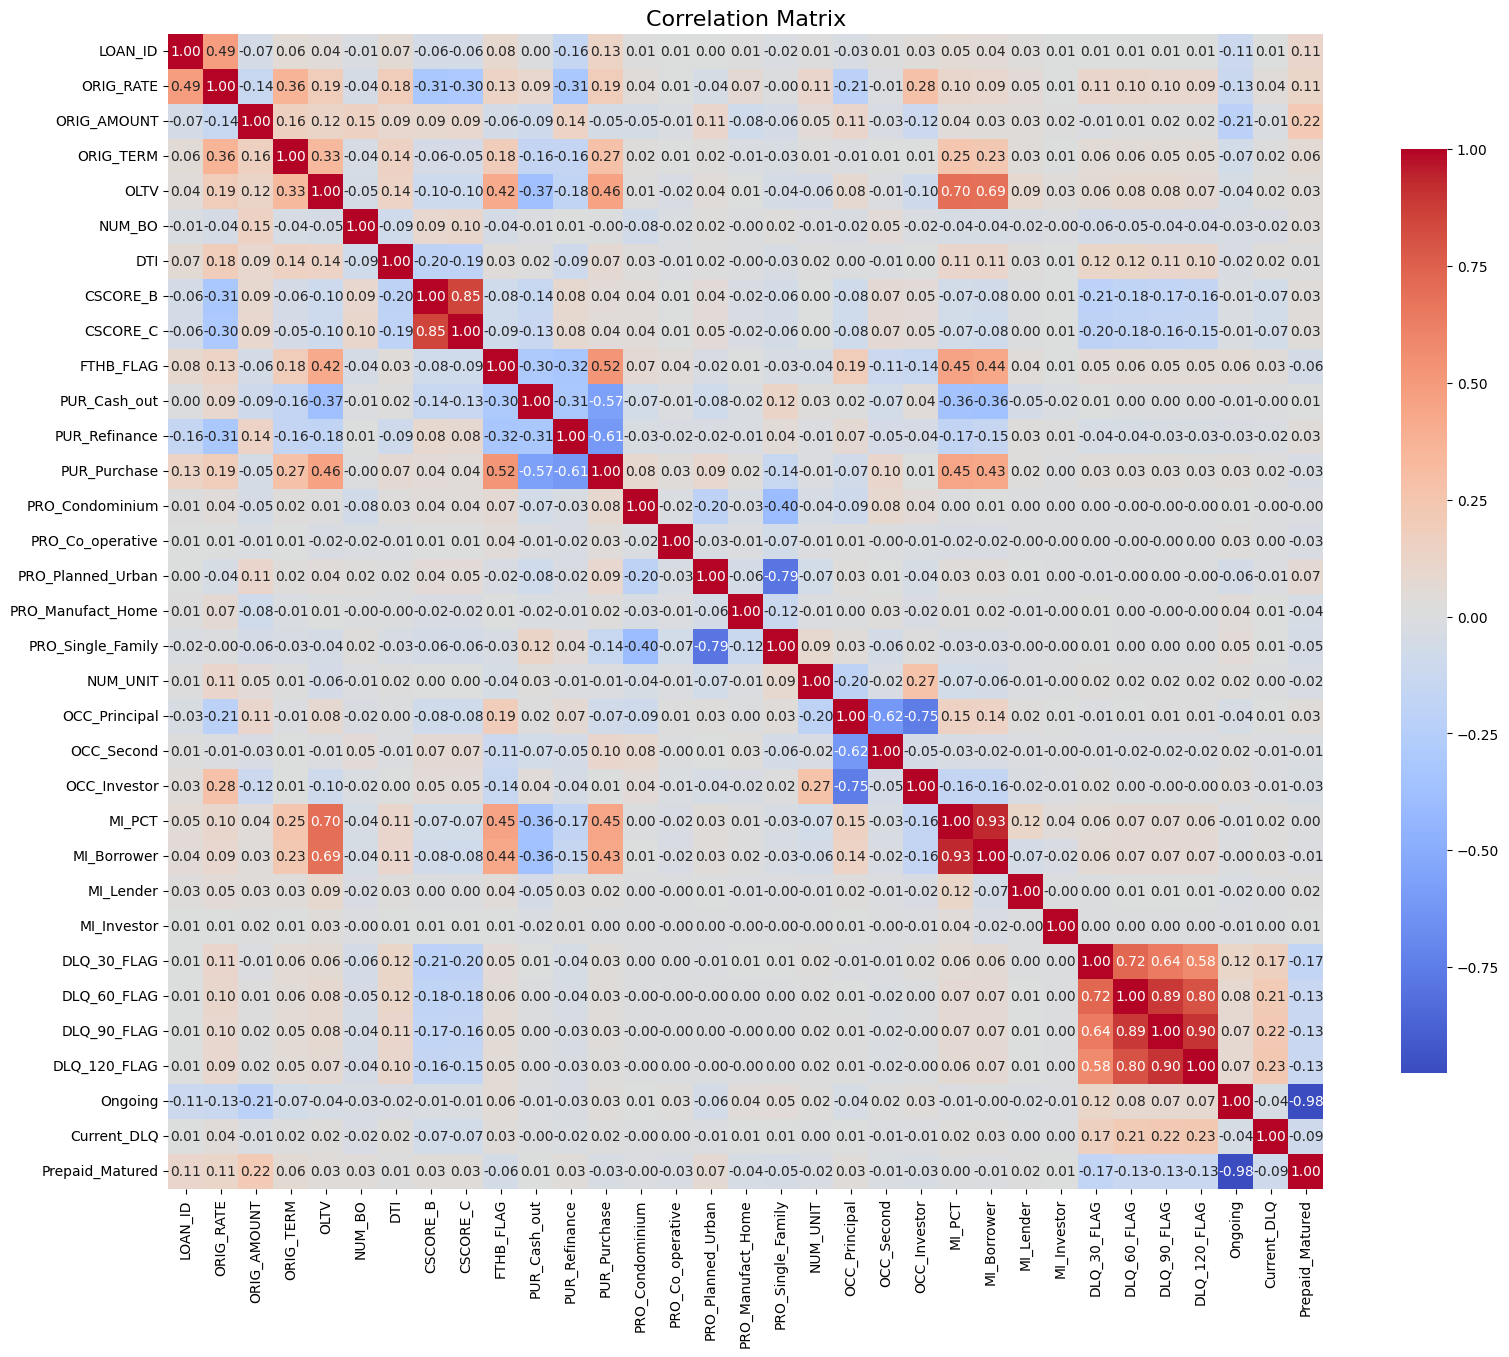

Processing: table_2020


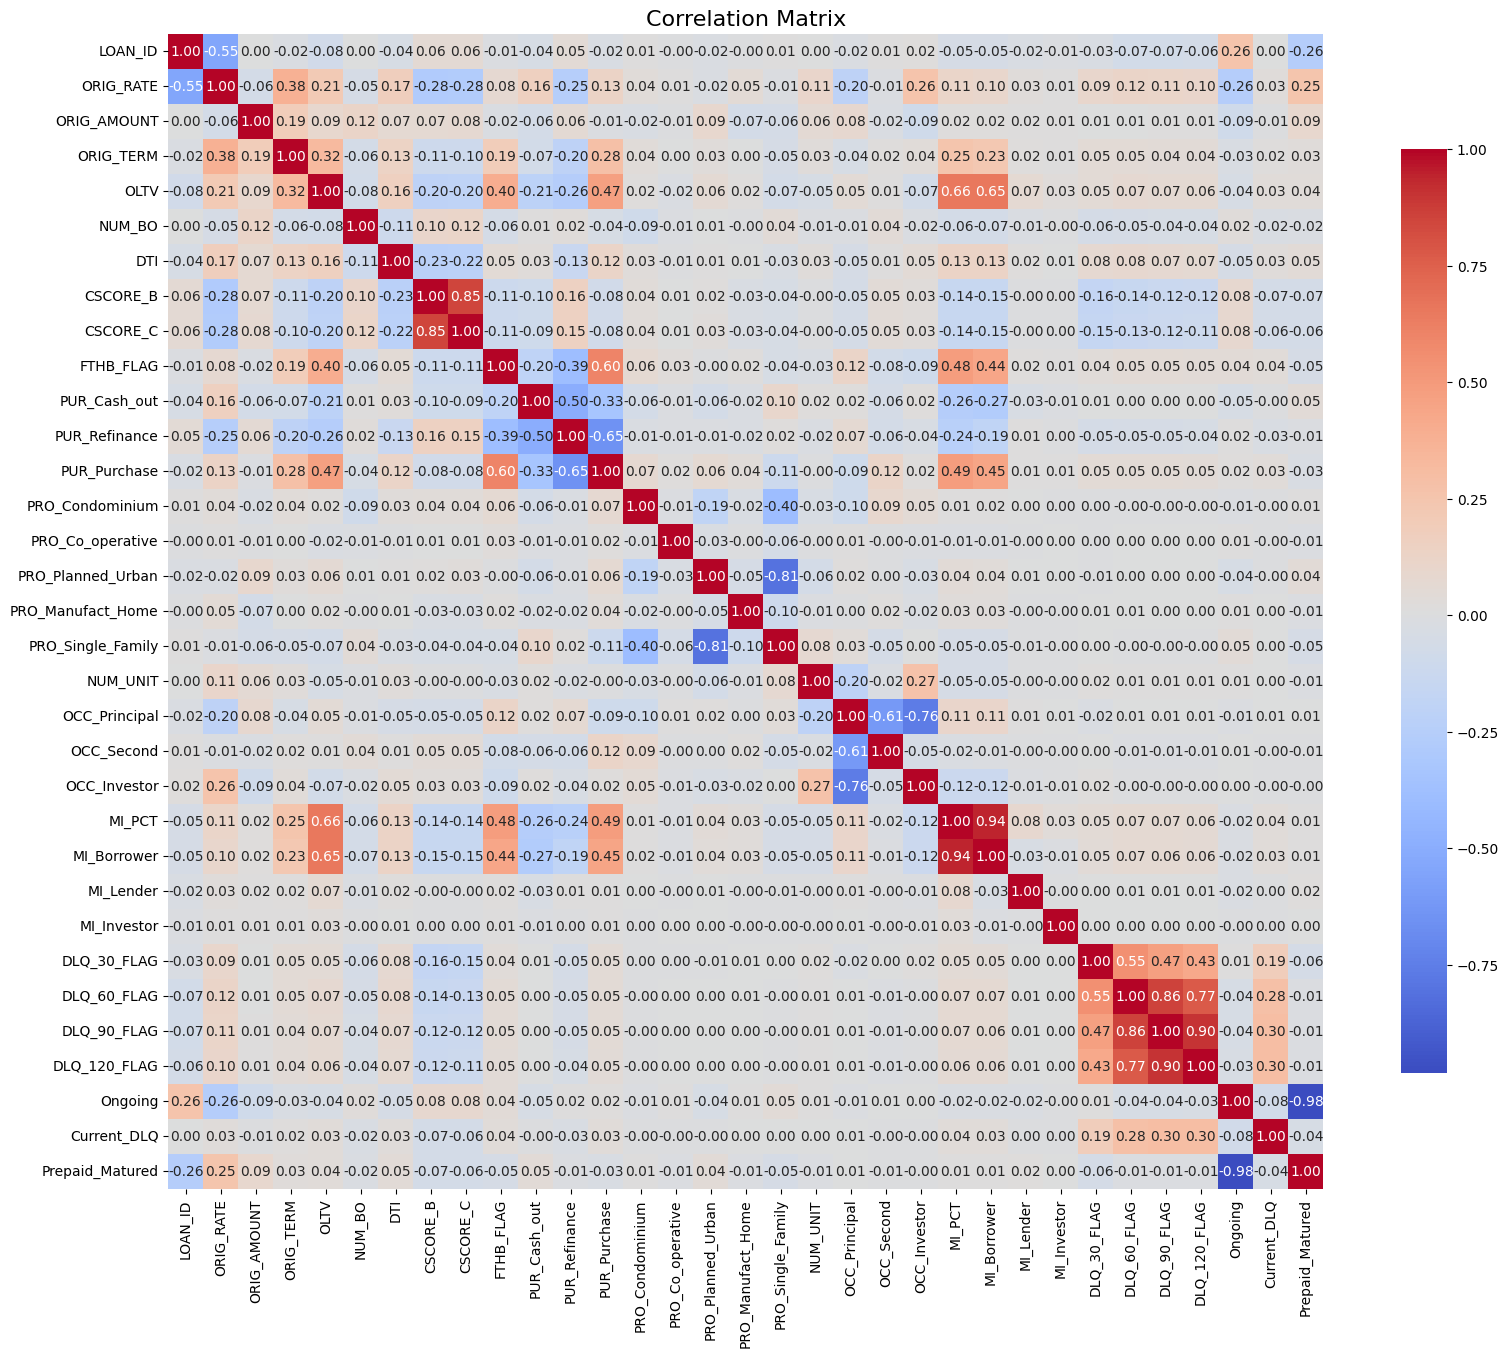

Processing: table_2021


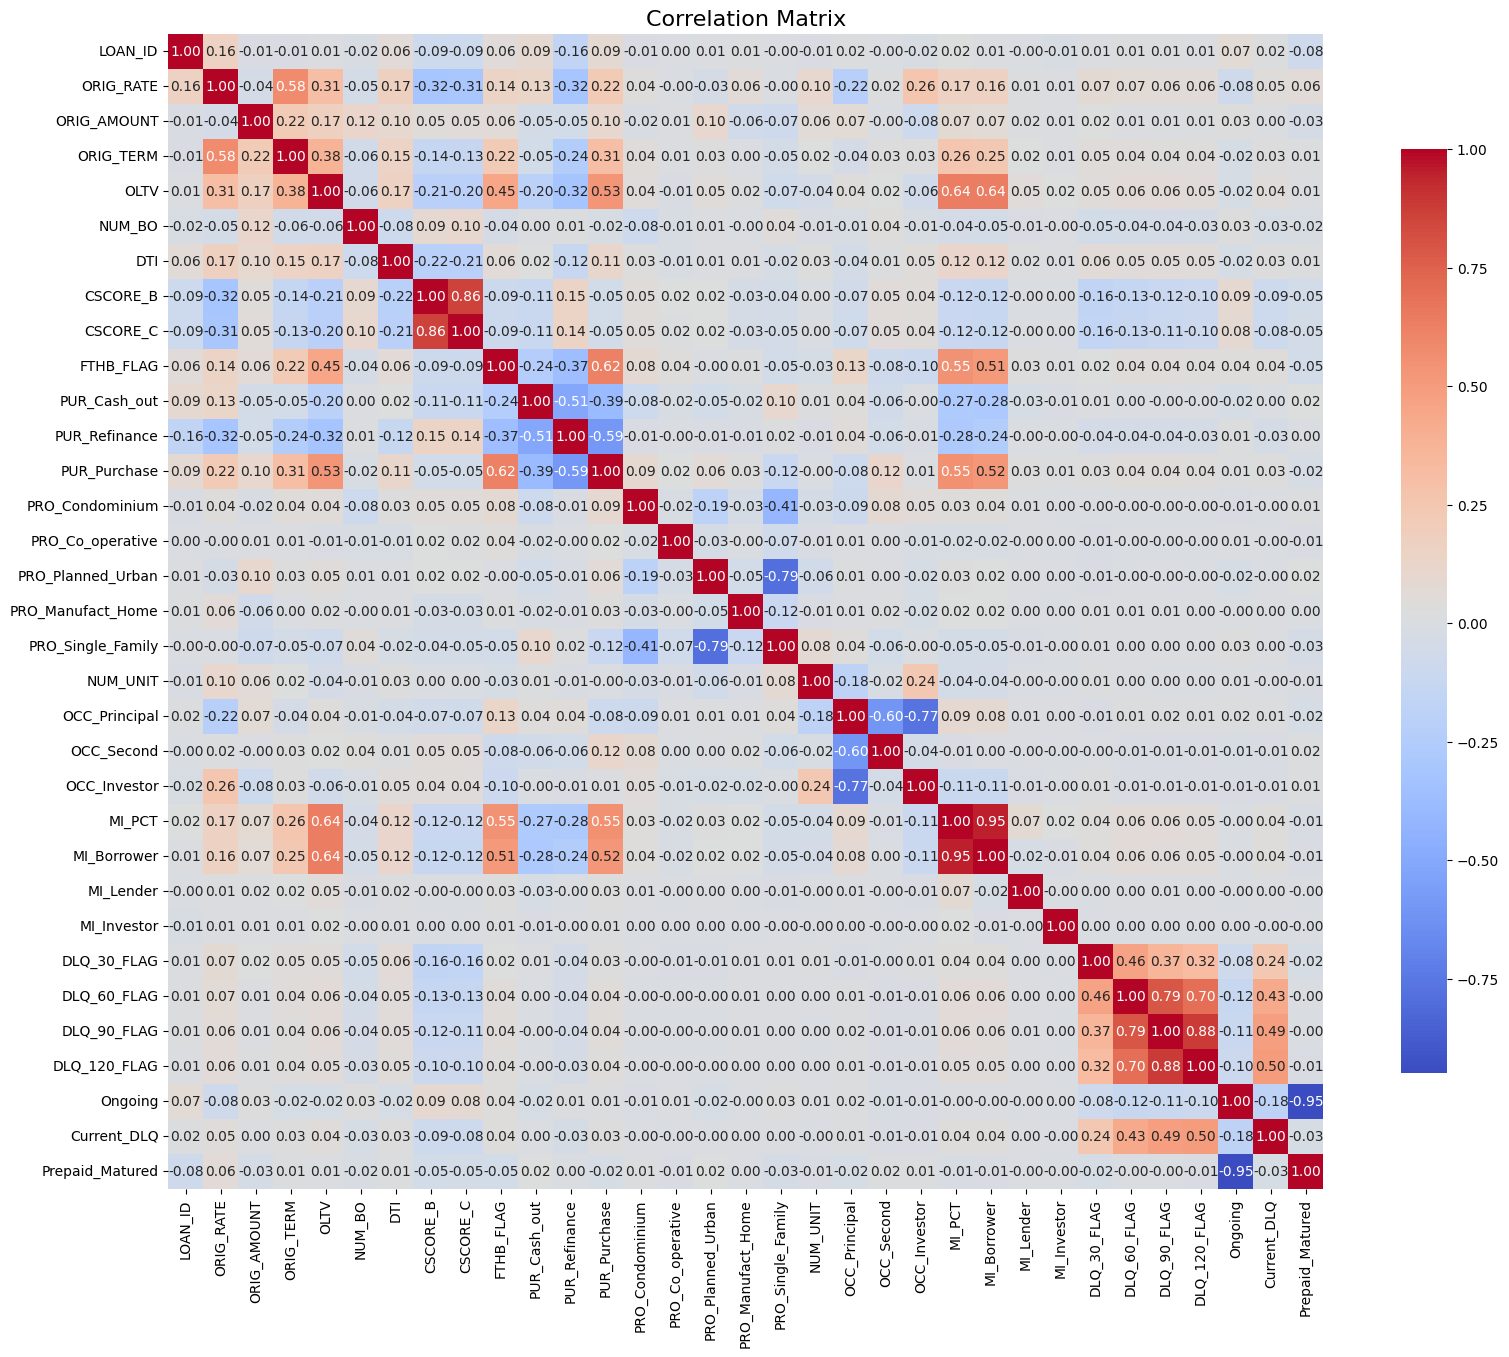

Processing: table_2022


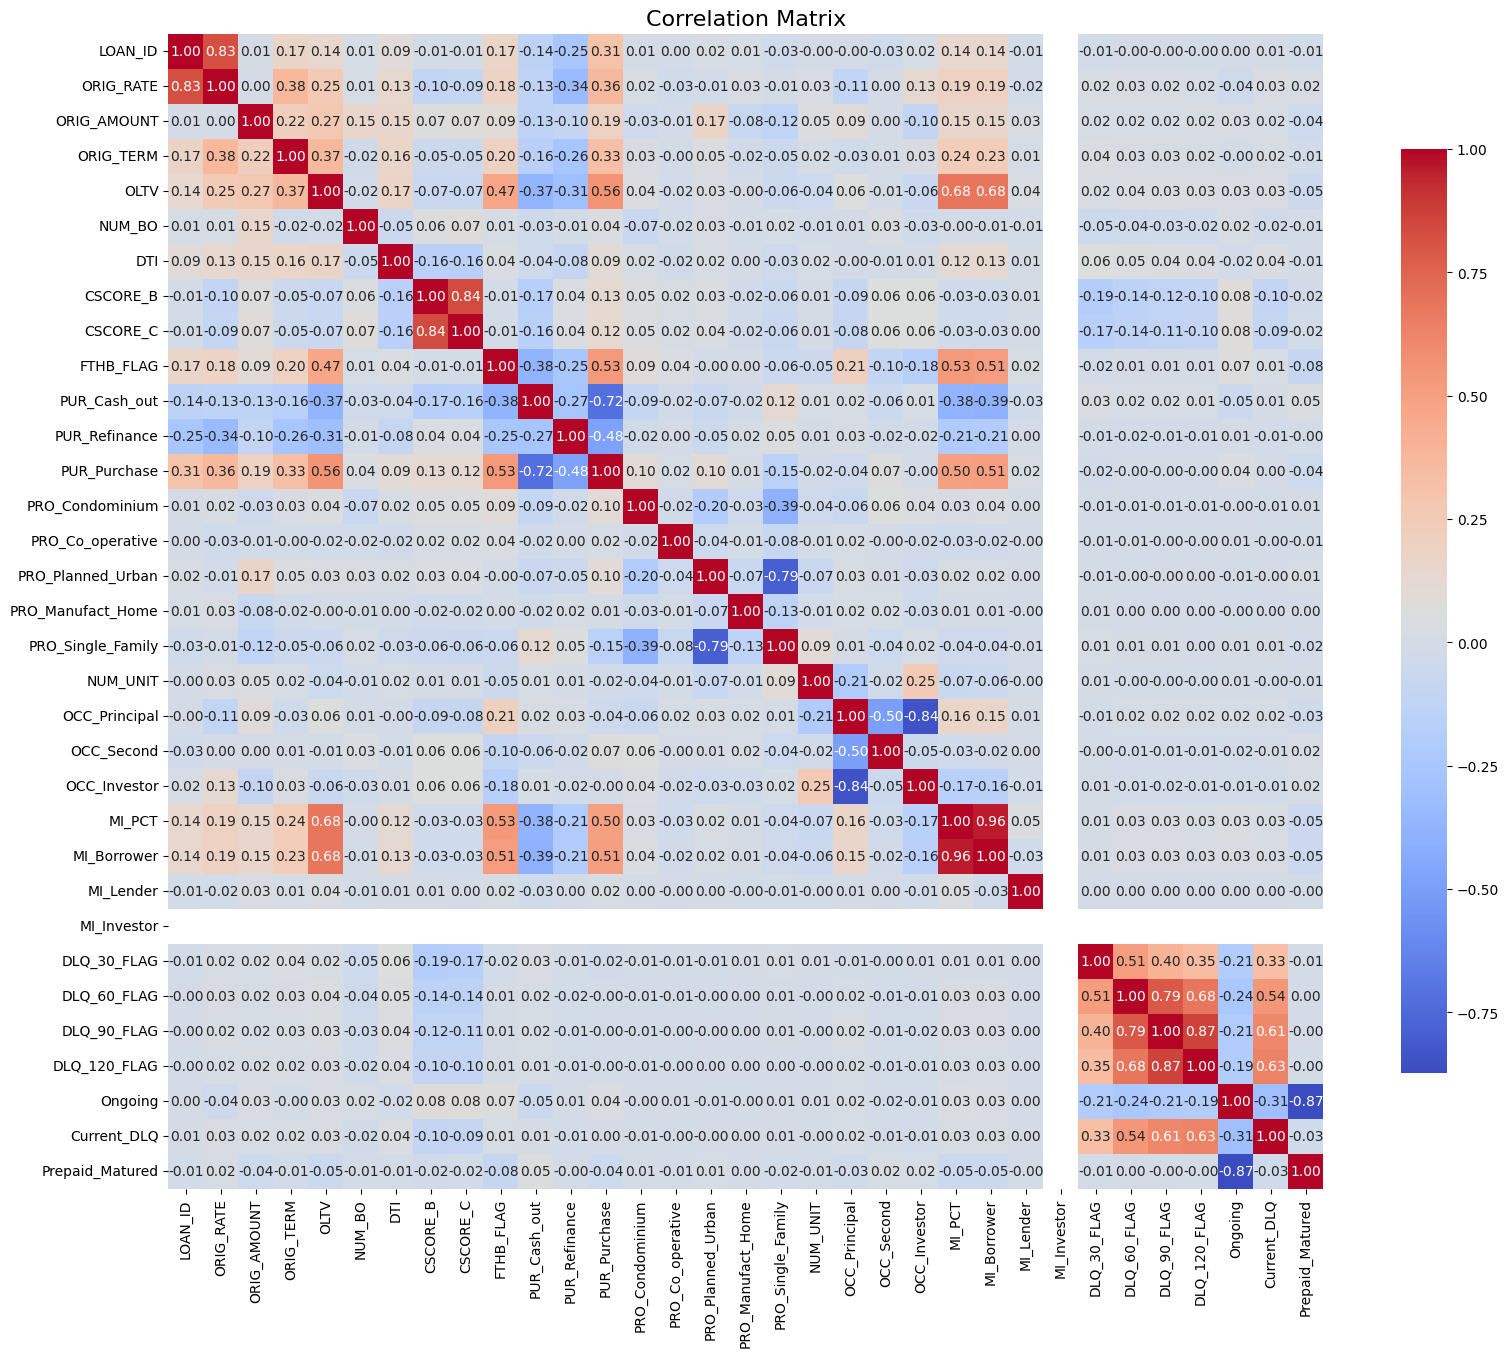

Processing: table_2023


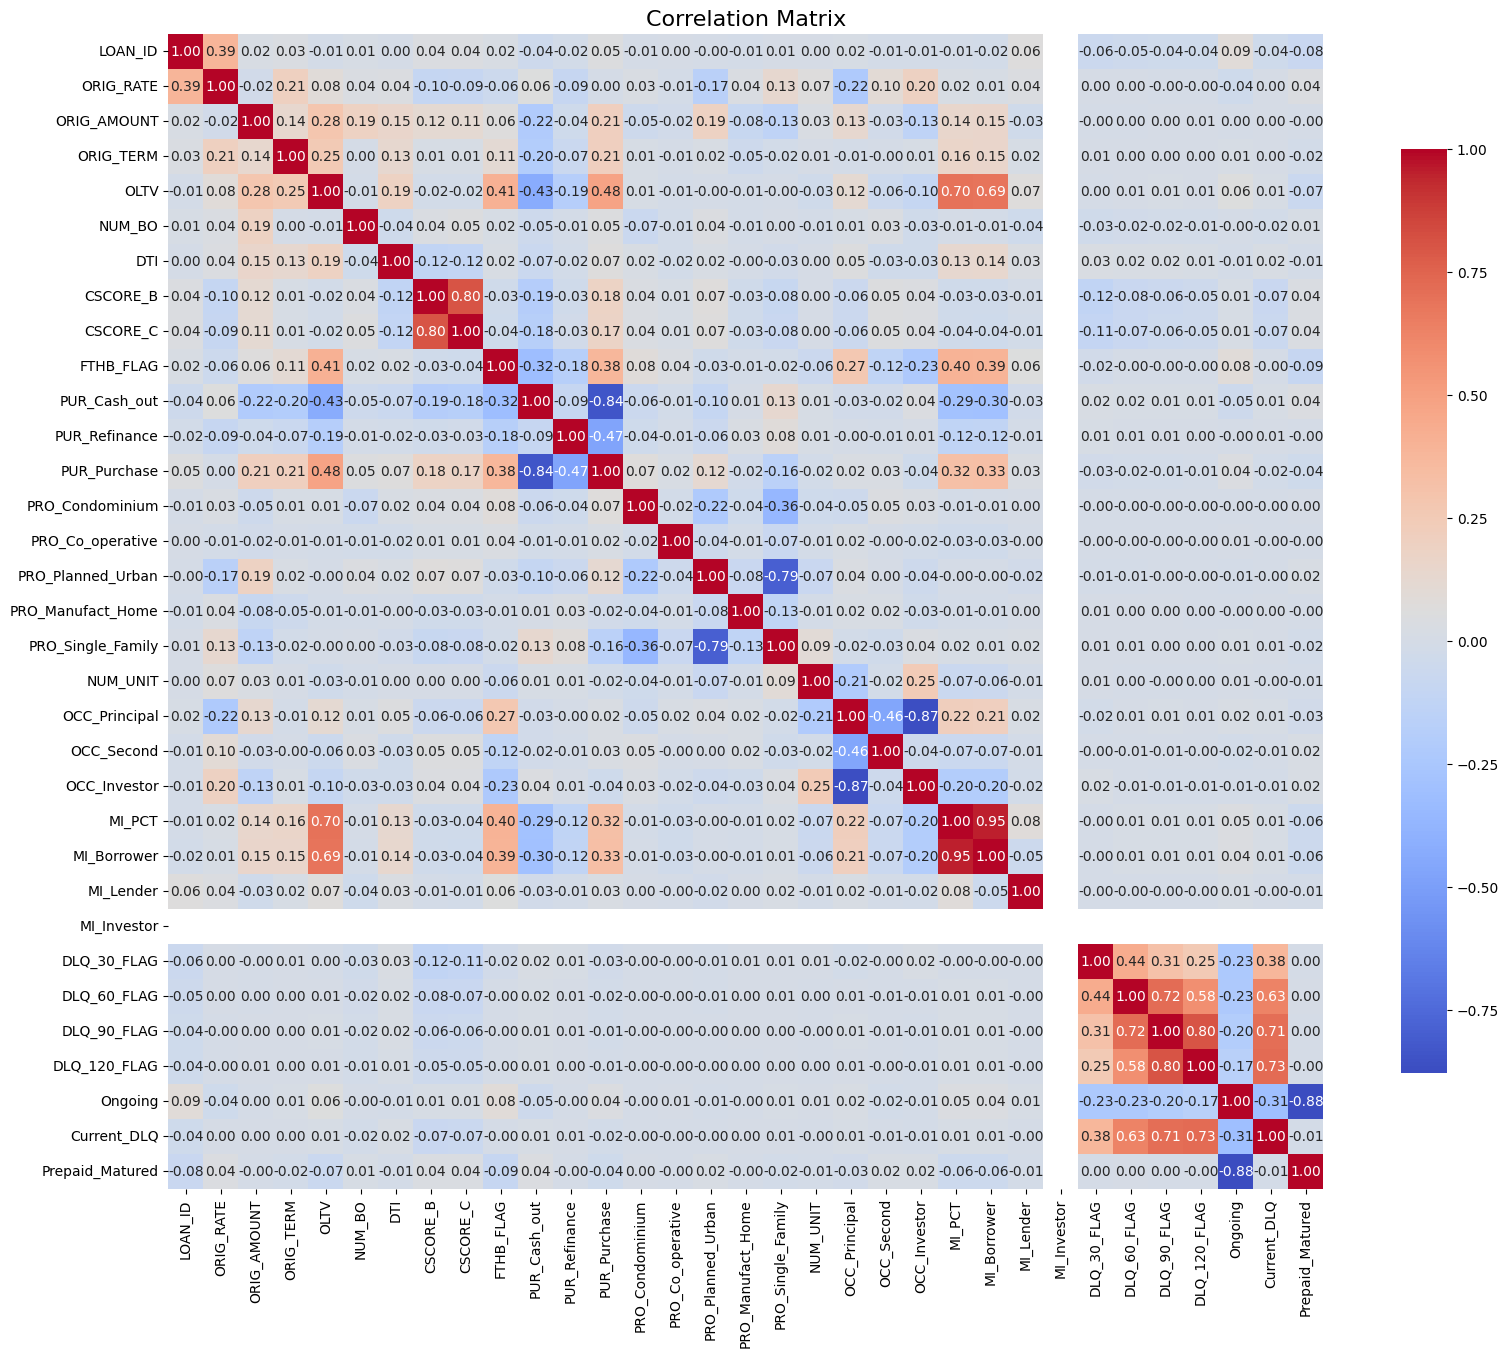

In [17]:
# Read-in processed data
# Filter based on columns relevant for modelling
COLS_TO_DROP = [
    'STATE','ZIP', 'MSA', 'AQSN_DTE', 'ORIG_DTE', 'FRST_DTE', 
    'LAST_RATE', 'LAST_UPB', 'LAST_ACTIVITY_DATE', 'Third_Party_Sale', 
    'Short_Sale', 'Repurchased', 'Deed_In_Lieu', 'Non_Performing_NS', 
    'Reperforming_NS','COMPLETE_FLAG', 'NET_LOSS','NET_SEV'  
]

for dataframe in ['table_'+str(year) for year in range(2019, 2024)]:
    print('Processing:', dataframe)
    data = eval(dataframe)
    # Drop any non-numerical cols
    data.drop(columns=COLS_TO_DROP, inplace=True)
    data = data[data.columns[data.dtypes!=object]]
    # Compute matrix
    correlation_matrix = data.corr()
    # Create a heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt=".2f", 
                cmap='coolwarm', 
                square=True, 
                cbar_kws={"shrink": .8}
                )
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()


In [18]:
print(table_2020["MI_Investor"].describe())
print(table_2023["MI_Investor"].describe())

count    4.817645e+06
mean     5.838952e-04
std      2.415687e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: MI_Investor, dtype: float64
count    970186.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: MI_Investor, dtype: float64


Proceeding with 2020 data.

In [ ]:
# Scaling data
REQUIRED_COLUMNS = [
    'ORIG_RATE', 'ORIG_AMOUNT', 'ORIG_TERM', 'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B', # 'CSCORE_C', 
    'FTHB_FLAG', 'PUR_Cash_out', 'PUR_Refinance', 'PUR_Purchase', 'NUM_UNIT', 
    'OCC_Principal', 'OCC_Second', 'OCC_Investor', 'MI_PCT', 'DLQ_30_FLAG', 'DLQ_60_FLAG', 
    'DLQ_90_FLAG', 'DLQ_120_FLAG',
    'Ongoing', 'Current_DLQ', 'Prepaid_Matured'
]
num_col = ['ORIG_RATE', 'ORIG_AMOUNT', 'ORIG_TERM', 'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B', # 'CSCORE_C', 
           'NUM_UNIT', 'MI_PCT']
cat_col = [col for col in table_2020[REQUIRED_COLUMNS].columns if col not in num_col]

pca_data = table_2020[REQUIRED_COLUMNS].copy()
scaler = StandardScaler()
pca_data[num_col] = scaler.fit_transform(pca_data[num_col])
# Dropping all performance columns
pca_data.drop(columns=['DLQ_30_FLAG', 'DLQ_60_FLAG', 'DLQ_90_FLAG', 'DLQ_120_FLAG', 'Ongoing', 'Current_DLQ', 'Prepaid_Matured'], inplace=True)

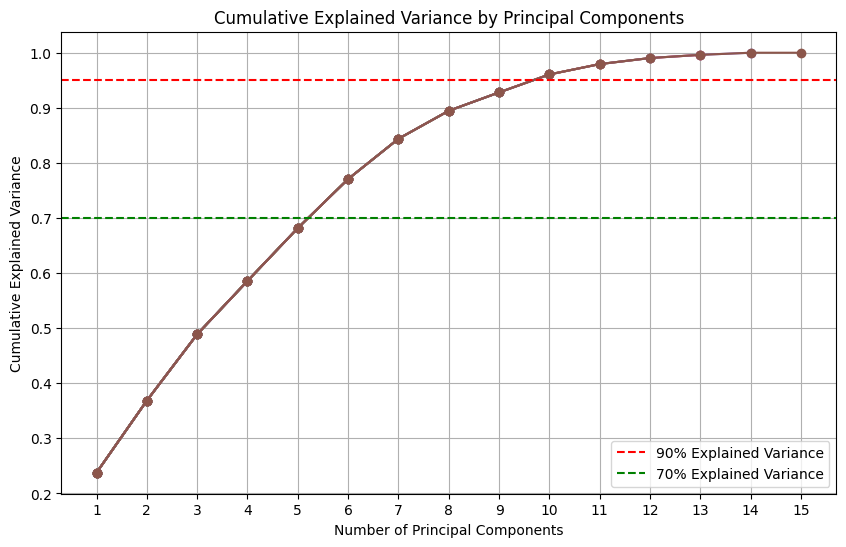

In [30]:
plt.close()
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(16):
    pca_= PCA(n_components=i)
    pca_.fit_transform(pca_data)

    # cumulative explained variance
    explained_variance = pca_.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance)

    # Plot cumulative explained variance
    
    ax.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', )
ax.set_title('Cumulative Explained Variance by Principal Components')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.axhline(y=0.95, color='r', linestyle='--', label='90% Explained Variance')
ax.axhline(y=0.70, color='g', linestyle='--', label='70% Explained Variance')
ax.set_xticks(range(1, len(cumulative_explained_variance) + 1))
ax.legend()
ax.grid()

plt.show()